In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np

In [49]:
# Inicializar o modelo
#model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda')

In [50]:
model = SentenceTransformer('all-mpnet-base-v2', device='cuda')

In [51]:
def generate_embeddings(query):
    # Inicializar o modelo dentro da função
    embeddings = model.encode(query)
    return embeddings

In [52]:
df = pd.read_excel("dados.xlsx")
df.head()


,LINK,ID da resposta,Data de envio,Última página,Idioma inicial,Semente,Código de Acesso,Data de início,Data da última ação,GENERO,...,ENV1,ENV2,ENV3,ENV4,ENV5,ENV6,ENV7,ENV8,ENV9,ENV10
0,INT,568,2021-06-20 15:00:50,7,pt-BR,1767601499,uB3EaV9IXANbGvm,2021-06-20 14:55:17,2021-06-20 15:00:49,Feminino,...,1,7,1,5,7,5,1,6,7,5
1,EXT,167,2021-05-21 22:10:05,7,pt-BR,1839169195,2021-05-21 21:59:31,2021-05-21 22:10:05,NaN,Feminino,...,3,3,4,1,4,4,4,3,3,3
2,INT,489,2021-06-20 11:19:30,7,pt-BR,258990084,BgKQgz43AnBGl68,2021-06-20 11:13:00,2021-06-20 11:19:30,Feminino,...,7,7,7,7,7,7,7,7,7,7
3,INT,536,2021-06-20 13:19:52,7,pt-BR,1424695604,wDN4DUIbrCgBWaG,2021-06-20 13:05:17,2021-06-20 13:19:52,Feminino,...,1,6,4,5,3,5,5,7,1,7
4,INT,486,2021-06-20 11:07:55,7,pt-BR,667378996,8vgAKmEjIZKMDvf,2021-06-20 11:03:18,2021-06-20 11:07:55,Masculino,...,7,7,7,7,4,7,5,6,7,7


In [53]:
df = df.drop(df.columns[[3,4,5,6]], axis=1)
df.head()

,LINK,ID da resposta,Data de envio,Data de início,Data da última ação,GENERO,IDADE,RENDA,ESCOLARIDADE,COMP/CEL,...,ENV1,ENV2,ENV3,ENV4,ENV5,ENV6,ENV7,ENV8,ENV9,ENV10
0,INT,568,2021-06-20 15:00:50,2021-06-20 14:55:17,2021-06-20 15:00:49,Feminino,30,Acima de 3 e até 5 salários mínimos,Mestrado/Doutorado,Celular,...,1,7,1,5,7,5,1,6,7,5
1,EXT,167,2021-05-21 22:10:05,2021-05-21 22:10:05,NaN,Feminino,35,Acima de 5 e até 10 salários mínimos,Pós-Graduação,Celular,...,3,3,4,1,4,4,4,3,3,3
2,INT,489,2021-06-20 11:19:30,2021-06-20 11:13:00,2021-06-20 11:19:30,Feminino,29,Até 1 salário mínimo,Ensino Superior,Celular,...,7,7,7,7,7,7,7,7,7,7
3,INT,536,2021-06-20 13:19:52,2021-06-20 13:05:17,2021-06-20 13:19:52,Feminino,28,Até 1 salário mínimo,Ensino Médio,Celular,...,1,6,4,5,3,5,5,7,1,7
4,INT,486,2021-06-20 11:07:55,2021-06-20 11:03:18,2021-06-20 11:07:55,Masculino,36,Acima de 3 e até 5 salários mínimos,Ensino Superior,Computador/Notebook,...,7,7,7,7,4,7,5,6,7,7


In [54]:
print(df["GENERO"].head())
print(df[df.columns[17]].isnull().sum())  # Verifique se há valores nulos
df["GENERO"] = df["GENERO"].fillna("Desconhecido")

0     Feminino
1     Feminino
2     Feminino
3     Feminino
4    Masculino
Name: GENERO, dtype: object
79


In [55]:
print(df[df.columns[17]].head())
print(df[df.columns[17]].isnull().sum())  # Verifique se há valores nulos
df[df.columns[17]] = df[df.columns[17]].fillna("Não informado")

0    Coletivo das Artes Motirô
1                Teatro mágico
2                     Cineritz
3                          NaN
4                          NaN
Name: Se você segue algum perfil de espaço cultural no Instagram, por favor, se puder, insira aqui o nome do perfil que considera acompanhar com maior frequência., dtype: object
79


In [56]:
print(df[df.columns[4]].unique())
print(df[df.columns[4]].isnull().sum())  # Verifique se há valores nulos
df[df.columns[4]] = df[df.columns[4]].fillna("sem data")

['2021-06-20 15:00:49' nan '2021-06-20 11:19:30' '2021-06-20 13:19:52'
 '2021-06-20 11:07:55' '2021-06-21 08:02:46' '2021-06-18 16:18:30'
 '2021-04-14 09:49:18' '2021-04-14 09:40:29' '2021-06-19 20:32:54'
 '2021-07-05 12:55:29' '2021-06-18 20:49:01' '2021-06-20 13:55:17'
 '2021-06-19 10:13:23' '2021-06-21 05:20:48' '2021-06-20 23:22:40'
 '2021-06-20 19:49:13' '2021-06-20 00:43:42' '2021-06-19 23:26:26'
 '2021-04-21 21:37:16' '2021-06-20 14:51:38' '2021-06-19 11:40:40'
 '2021-06-20 19:06:38' '2021-06-21 21:00:58' '2021-06-20 15:04:56'
 '2021-06-19 16:57:23' '2021-04-14 16:11:05' '2021-06-20 13:22:44'
 '2021-06-20 15:54:28' '2021-07-13 11:22:29' '2021-04-15 10:59:46'
 '2021-06-21 10:27:22' '2021-06-21 13:26:44' '2021-06-20 18:15:18'
 '2021-06-21 15:21:56' '2021-04-28 14:32:29' '2021-06-21 00:02:26'
 '2021-06-19 11:15:13' '2021-06-20 15:33:02' '2021-06-21 12:51:36'
 '2021-06-19 20:13:45' '2021-06-20 21:52:08' '2021-06-20 12:17:34'
 '2021-06-20 15:19:27' '2021-06-21 09:43:47' '2021-06-20 1

In [57]:
p = 0
for i in range(df.shape[1]):
    num = df[df.columns[i]].isnull().sum()
    
    if(num != 0):
        print(i)
        p = p + 1
    if pd.api.types.is_numeric_dtype(df[df.columns[i]]):  # Verifica se a coluna é numérica
        print(f"Coluna numérica {i}:")
        df[df.columns[i]] = df[df.columns[i]].astype(str)
print(f"Tem {p} colunas com alguns valores nulos")

Coluna numérica 1:
Coluna numérica 6:
Coluna numérica 18:
Coluna numérica 19:
Coluna numérica 20:
Coluna numérica 21:
Coluna numérica 22:
Coluna numérica 23:
Coluna numérica 24:
Coluna numérica 25:
Coluna numérica 26:
Coluna numérica 27:
Coluna numérica 28:
Coluna numérica 29:
Coluna numérica 30:
Coluna numérica 31:
Coluna numérica 32:
Coluna numérica 33:
Coluna numérica 34:
Coluna numérica 35:
Coluna numérica 36:
Coluna numérica 37:
Coluna numérica 38:
Coluna numérica 39:
Coluna numérica 40:
Coluna numérica 41:
Coluna numérica 42:
Coluna numérica 43:
Coluna numérica 44:
Coluna numérica 45:
Coluna numérica 46:
Coluna numérica 47:
Coluna numérica 48:
Coluna numérica 49:
Coluna numérica 50:
Coluna numérica 51:
Coluna numérica 52:
Coluna numérica 53:
Coluna numérica 54:
Coluna numérica 55:
Coluna numérica 56:
Coluna numérica 57:
Coluna numérica 58:
Coluna numérica 59:
Coluna numérica 60:
Coluna numérica 61:
Coluna numérica 62:
Coluna numérica 63:
Coluna numérica 64:
Coluna numérica 65:
Co

In [58]:
df.head()

,LINK,ID da resposta,Data de envio,Data de início,Data da última ação,GENERO,IDADE,RENDA,ESCOLARIDADE,COMP/CEL,...,ENV1,ENV2,ENV3,ENV4,ENV5,ENV6,ENV7,ENV8,ENV9,ENV10
0,INT,568,2021-06-20 15:00:50,2021-06-20 14:55:17,2021-06-20 15:00:49,Feminino,30,Acima de 3 e até 5 salários mínimos,Mestrado/Doutorado,Celular,...,1,7,1,5,7,5,1,6,7,5
1,EXT,167,2021-05-21 22:10:05,2021-05-21 22:10:05,sem data,Feminino,35,Acima de 5 e até 10 salários mínimos,Pós-Graduação,Celular,...,3,3,4,1,4,4,4,3,3,3
2,INT,489,2021-06-20 11:19:30,2021-06-20 11:13:00,2021-06-20 11:19:30,Feminino,29,Até 1 salário mínimo,Ensino Superior,Celular,...,7,7,7,7,7,7,7,7,7,7
3,INT,536,2021-06-20 13:19:52,2021-06-20 13:05:17,2021-06-20 13:19:52,Feminino,28,Até 1 salário mínimo,Ensino Médio,Celular,...,1,6,4,5,3,5,5,7,1,7
4,INT,486,2021-06-20 11:07:55,2021-06-20 11:03:18,2021-06-20 11:07:55,Masculino,36,Acima de 3 e até 5 salários mínimos,Ensino Superior,Computador/Notebook,...,7,7,7,7,4,7,5,6,7,7


In [59]:
# Selecionar automaticamente todas as colunas
columns_embeddings = df.columns

# Concatenar todas as colunas de strings em uma só
df['Text_Embedding'] = df[columns_embeddings].apply(
    lambda row: ', '.join(row.values.astype(str)), axis=1
)

print(df['Text_Embedding'])

0      INT, 568, 2021-06-20 15:00:50, 2021-06-20 14:5...
1      EXT, 167, 2021-05-21 22:10:05, 2021-05-21 22:1...
2      INT, 489, 2021-06-20 11:19:30, 2021-06-20 11:1...
3      INT, 536, 2021-06-20 13:19:52, 2021-06-20 13:0...
4      INT, 486, 2021-06-20 11:07:55, 2021-06-20 11:0...
                             ...                        
310    INT, 207, 2021-06-18 19:01:05, 2021-06-18 18:5...
311    INT, 452, 2021-06-20 08:46:44, 2021-06-20 08:4...
312    EXT, 138, 2021-05-20 21:27:00, 2021-05-20 21:2...
313    INT, 1053, 2021-07-12 13:58:07, 2021-07-12 13:...
314    INT, 570, 2021-06-20 15:08:09, 2021-06-20 15:0...
Name: Text_Embedding, Length: 315, dtype: object


In [60]:
#for i in range(df.shape[1]):
df['Text_Embedding'] = df['Text_Embedding'].apply(generate_embeddings)


In [61]:
df.head()

,LINK,ID da resposta,Data de envio,Data de início,Data da última ação,GENERO,IDADE,RENDA,ESCOLARIDADE,COMP/CEL,...,ENV2,ENV3,ENV4,ENV5,ENV6,ENV7,ENV8,ENV9,ENV10,Text_Embedding
0,INT,568,2021-06-20 15:00:50,2021-06-20 14:55:17,2021-06-20 15:00:49,Feminino,30,Acima de 3 e até 5 salários mínimos,Mestrado/Doutorado,Celular,...,7,1,5,7,5,1,6,7,5,"[-0.024647718, -0.020997217, -0.054413743, 0.0..."
1,EXT,167,2021-05-21 22:10:05,2021-05-21 22:10:05,sem data,Feminino,35,Acima de 5 e até 10 salários mínimos,Pós-Graduação,Celular,...,3,4,1,4,4,4,3,3,3,"[0.0025199754, -0.027716314, -0.04793156, -0.0..."
2,INT,489,2021-06-20 11:19:30,2021-06-20 11:13:00,2021-06-20 11:19:30,Feminino,29,Até 1 salário mínimo,Ensino Superior,Celular,...,7,7,7,7,7,7,7,7,7,"[-0.025542578, -0.003196782, -0.05655602, 0.02..."
3,INT,536,2021-06-20 13:19:52,2021-06-20 13:05:17,2021-06-20 13:19:52,Feminino,28,Até 1 salário mínimo,Ensino Médio,Celular,...,6,4,5,3,5,5,7,1,7,"[-0.011622569, -0.0017562418, -0.05448546, 0.0..."
4,INT,486,2021-06-20 11:07:55,2021-06-20 11:03:18,2021-06-20 11:07:55,Masculino,36,Acima de 3 e até 5 salários mínimos,Ensino Superior,Computador/Notebook,...,7,7,7,4,7,5,6,7,7,"[-0.020109968, -0.02107203, -0.04842528, 0.045..."


In [62]:
#df["GENERO"] = df["GENERO"].fillna("Desconhecido")
# Generate Embeddings for all the products
#df["IDADE"] = df["IDADE"].astype(str)  # Converte todos os valores para string
#df['Text_Embedding'] = df["IDADE"].apply(generate_embeddings)
#print(generate_embeddings("feminino"))

In [63]:
df['vector_size'] = df['Text_Embedding'].apply(len)
print(df['vector_size'].value_counts())  # Mostra as dimensões mais comuns

vector_size
768    315
Name: count, dtype: int64


In [64]:
df['Text_Embedding'].head()

0    [-0.024647718, -0.020997217, -0.054413743, 0.0...
1    [0.0025199754, -0.027716314, -0.04793156, -0.0...
2    [-0.025542578, -0.003196782, -0.05655602, 0.02...
3    [-0.011622569, -0.0017562418, -0.05448546, 0.0...
4    [-0.020109968, -0.02107203, -0.04842528, 0.045...
Name: Text_Embedding, dtype: object

In [ ]:
embeddings_df = pd.DataFrame(df['Text_Embedding'].tolist())
# Suponha que 'embeddings' seja seu array numpy
np.savetxt("data/IN/dataset.txt", embeddings_df, delimiter=" ", fmt="%.8f")
embeddings_df

In [65]:
import faiss                   # make faiss available
ncentroids = 3
niter = 30
verbose = True
d = 768
kmeans = faiss.Kmeans(d, ncentroids, niter=niter, verbose=verbose)
embeddings = np.array(df['Text_Embedding'].to_list(), dtype='float32')
print(embeddings.shape)  # Deve retornar (n_samples, 71)
kmeans.train(embeddings)

(315, 768)
Clustering 315 points in 768D to 3 clusters, redo 1 times, 30 iterations
  Preprocessing in 0.00 s
  Iteration 29 (0.07 s, search 0.04 s): objective=40.5093 imbalance=1.463 nsplit=0       


40.50932312011719

In [66]:
D, I = kmeans.index.search(np.array(df['Text_Embedding'].to_list()), 1)

In [67]:
I


array([[1],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [1],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [1],
       [0],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
    

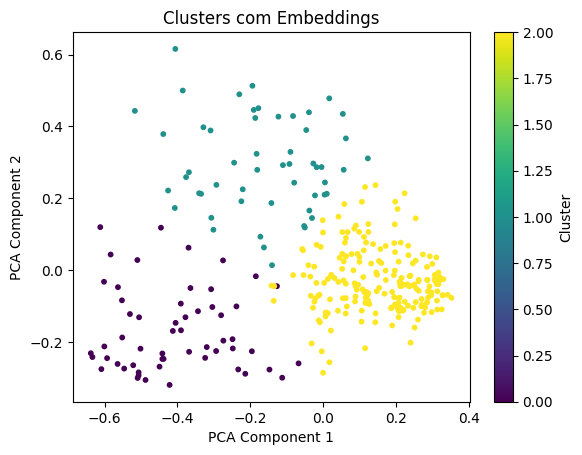

In [74]:
from sklearn.decomposition import PCA

# Reduzir dimensões para visualização
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df['Text_Embedding'].to_list())
df['features'] = data_2d.tolist()
# Adicionar resultados ao DataFrame
df['Cluster'] = I.flatten()
df['Distance_to_Center'] = D.flatten()

# Plotar clusters
import matplotlib.pyplot as plt
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=df['Cluster'], cmap='viridis', s=10)
plt.title('Clusters com Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


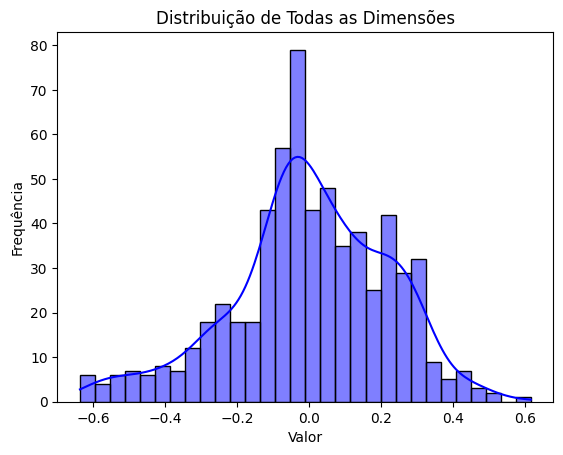

In [78]:
import seaborn as sns
# Achatar todos os valores em uma única lista
flattened_values = [value for sublist in df['features'] for value in sublist]
sns.histplot(flattened_values, kde=True, bins=30, color='blue')
plt.title('Distribuição de Todas as Dimensões')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

